In [116]:
## core packages

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
head_injury = pd.read_csv("headInjury.csv")
head_injury.head(5)

,Unnamed: 0,age.65,amnesia.before,basal.skull.fracture,GCS.decrease,GCS.13,GCS.15.2hours,high.risk,loss.of.consciousness,open.skull.fracture,vomiting,clinically.important.brain.injury
0,1,0,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,1,0,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,0,0


In [3]:
# drop the first column since it is basically just the index

head_injury.drop('Unnamed: 0', axis = 1, inplace=True)
head_injury

,age.65,amnesia.before,basal.skull.fracture,GCS.decrease,GCS.13,GCS.15.2hours,high.risk,loss.of.consciousness,open.skull.fracture,vomiting,clinically.important.brain.injury
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3116,0,0,0,0,0,1,1,0,0,0,0
3117,0,0,0,0,0,0,1,0,0,1,0
3118,0,0,0,0,0,0,0,0,0,0,0
3119,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# see if there is any null value

head_injury.isnull().sum()

age.65                               0
amnesia.before                       0
basal.skull.fracture                 0
GCS.decrease                         0
GCS.13                               0
GCS.15.2hours                        0
high.risk                            0
loss.of.consciousness                0
open.skull.fracture                  0
vomiting                             0
clinically.important.brain.injury    0
dtype: int64

In [5]:
head_injury.describe()

,age.65,amnesia.before,basal.skull.fracture,GCS.decrease,GCS.13,GCS.15.2hours,high.risk,loss.of.consciousness,open.skull.fracture,vomiting,clinically.important.brain.injury
count,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000
mean,0.115988,0.204742,0.069849,0.022749,0.037488,0.126562,0.242871,0.111823,0.036847,0.098686,0.080103
std,0.320262,0.403578,0.254934,0.149127,0.189985,0.332535,0.428886,0.315199,0.188417,0.298288,0.271495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It looks like all variables' values are binary (0, 1). We will not need to standarize or normalize the data. 

In [132]:
## Let's double check their data types to make sure that they are all numeric
head_injury.dtypes

age.65                               int64
amnesia.before                       int64
basal.skull.fracture                 int64
GCS.decrease                         int64
GCS.13                               int64
GCS.15.2hours                        int64
high.risk                            int64
loss.of.consciousness                int64
open.skull.fracture                  int64
vomiting                             int64
clinically.important.brain.injury    int64
dtype: object

In [113]:
## creating a table

head_injury.apply(pd.value_counts)

,age.65,amnesia.before,basal.skull.fracture,GCS.decrease,GCS.13,GCS.15.2hours,high.risk,loss.of.consciousness,open.skull.fracture,vomiting,clinically.important.brain.injury
0,2759,2482,2903,3050,3004,2726,2363,2772,3006,2813,2871
1,362,639,218,71,117,395,758,349,115,308,250


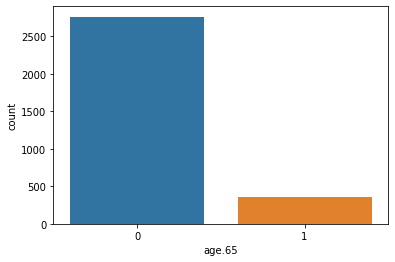

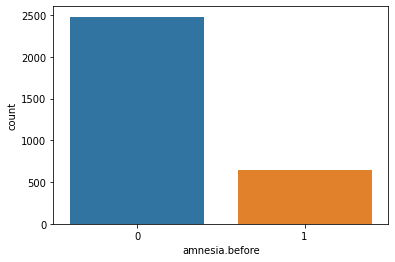

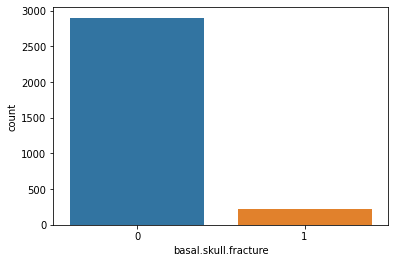

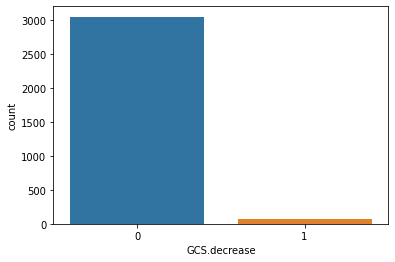

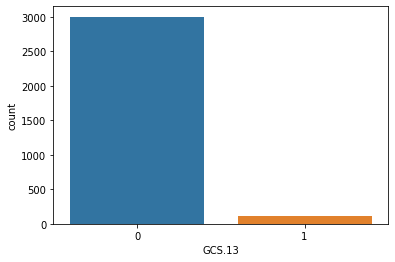

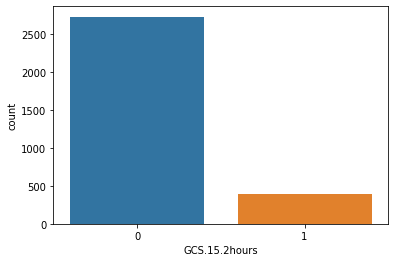

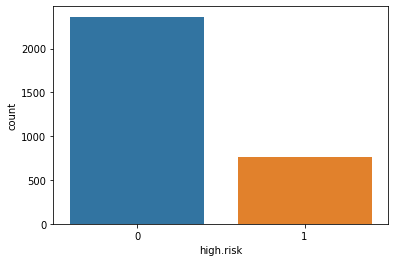

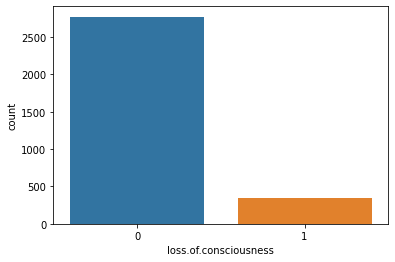

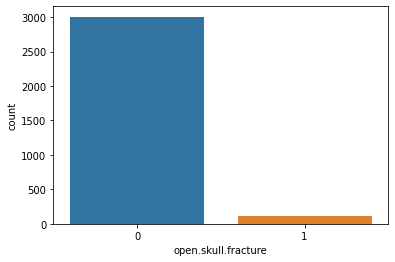

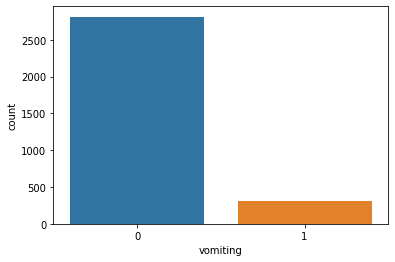

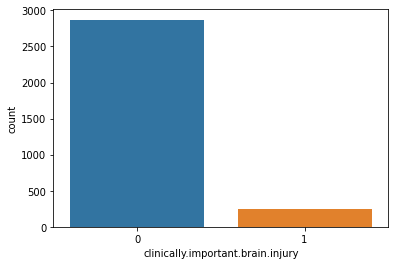

In [12]:
# Check for distribution of all variables

for i, col in enumerate(head_injury.columns):
    plt.figure(i)
    sns.countplot(x=head_injury[col])

<AxesSubplot:xlabel='age.65', ylabel='count'>

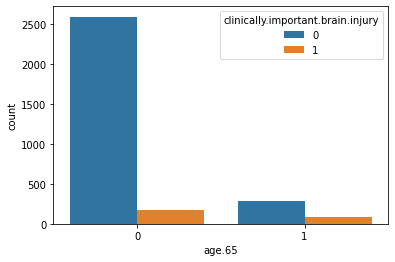

In [16]:
# Grouped bar chart - let's do each input variable to the output variable

sns.countplot(x = 'age.65', hue = 'clinically.important.brain.injury', data = head_injury)

<AxesSubplot:xlabel='amnesia.before', ylabel='count'>

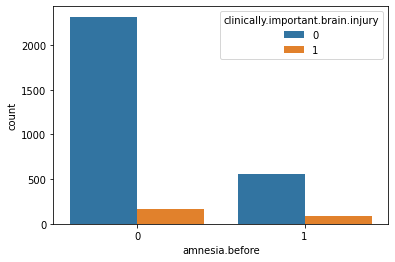

In [17]:
sns.countplot(x = 'amnesia.before', hue = 'clinically.important.brain.injury', data = head_injury)

<AxesSubplot:xlabel='basal.skull.fracture', ylabel='count'>

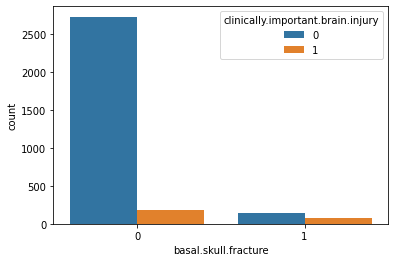

In [18]:
sns.countplot(x = 'basal.skull.fracture', hue = 'clinically.important.brain.injury', data = head_injury)

<AxesSubplot:xlabel='GCS.decrease', ylabel='count'>

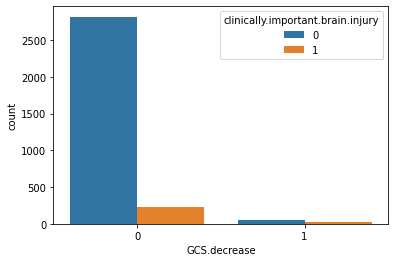

In [19]:
sns.countplot(x = 'GCS.decrease', hue = 'clinically.important.brain.injury', data = head_injury)

<AxesSubplot:xlabel='GCS.13', ylabel='count'>

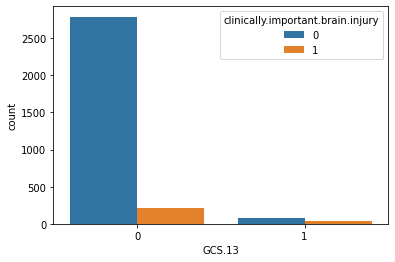

In [20]:
sns.countplot(x = 'GCS.13', hue = 'clinically.important.brain.injury', data = head_injury)

<AxesSubplot:xlabel='GCS.15.2hours', ylabel='count'>

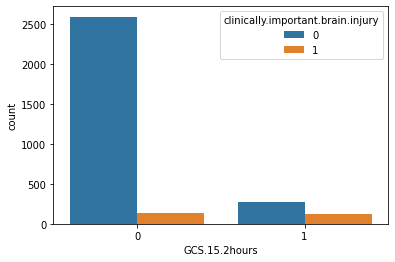

In [21]:
sns.countplot(x = 'GCS.15.2hours', hue = 'clinically.important.brain.injury', data = head_injury)

<AxesSubplot:xlabel='high.risk', ylabel='count'>

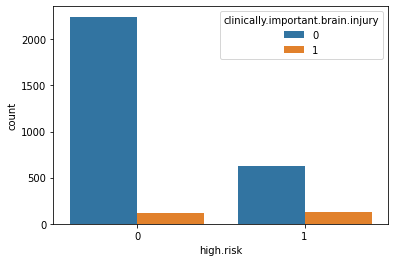

In [22]:
sns.countplot(x = 'high.risk', hue = 'clinically.important.brain.injury', data = head_injury)

<AxesSubplot:xlabel='loss.of.consciousness', ylabel='count'>

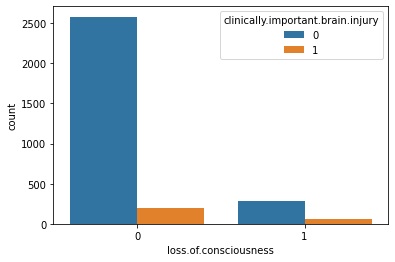

In [23]:
sns.countplot(x = 'loss.of.consciousness', hue = 'clinically.important.brain.injury', data = head_injury)

<AxesSubplot:xlabel='open.skull.fracture', ylabel='count'>

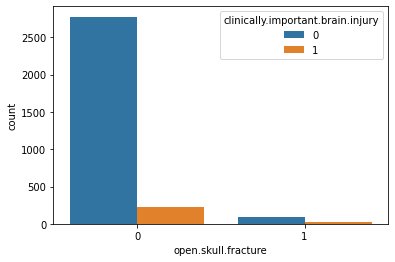

In [24]:
sns.countplot(x = 'open.skull.fracture', hue = 'clinically.important.brain.injury', data = head_injury)

<AxesSubplot:xlabel='vomiting', ylabel='count'>

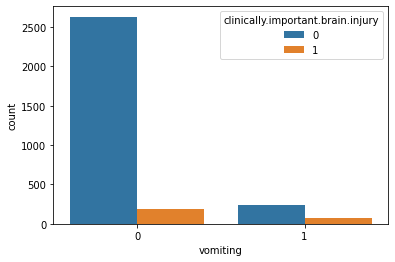

In [25]:
sns.countplot(x = 'vomiting', hue = 'clinically.important.brain.injury', data = head_injury)

<AxesSubplot:xlabel='GCS.13', ylabel='count'>

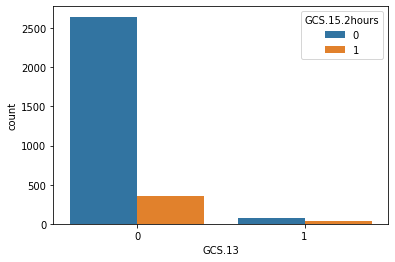

In [26]:
# Now let's compare some interesting input variables to each other

sns.countplot(x = 'GCS.13', hue = 'GCS.15.2hours', data = head_injury)

<AxesSubplot:xlabel='basal.skull.fracture', ylabel='count'>

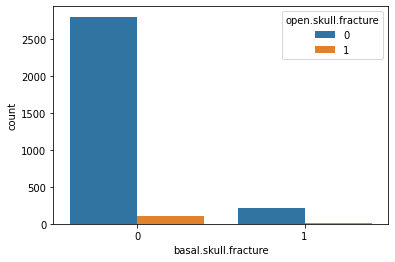

In [27]:
sns.countplot(x = 'basal.skull.fracture', hue = 'open.skull.fracture', data = head_injury)

<AxesSubplot:xlabel='high.risk', ylabel='count'>

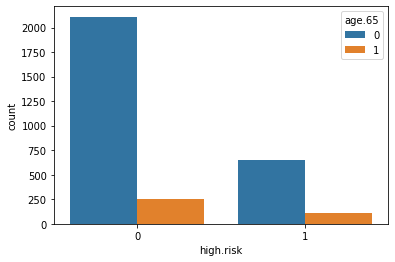

In [28]:
sns.countplot(x = "high.risk", hue = "age.65", data = head_injury)

In [29]:
## correlation between variables
head_injury.corr()

,age.65,amnesia.before,basal.skull.fracture,GCS.decrease,GCS.13,GCS.15.2hours,high.risk,loss.of.consciousness,open.skull.fracture,vomiting,clinically.important.brain.injury
age.65,1.000000,0.051786,0.026359,0.085664,0.007529,0.075794,0.049191,0.046102,0.061940,0.031120,0.191692
amnesia.before,0.051786,1.000000,-0.014435,0.029095,0.037811,0.057621,0.012602,0.003893,0.027206,0.031788,0.101839
basal.skull.fracture,0.026359,-0.014435,1.000000,0.152095,0.111358,0.092287,0.044130,0.006472,0.013127,0.048413,0.243291
GCS.decrease,0.085664,0.029095,0.152095,1.000000,0.071705,0.116430,0.068936,0.020869,0.050007,0.072005,0.113305
GCS.13,0.007529,0.037811,0.111358,0.071705,1.000000,0.112588,0.045567,0.004906,0.024076,0.047812,0.153036
GCS.15.2hours,0.075794,0.057621,0.092287,0.116430,0.112588,1.000000,0.081052,0.045348,0.038087,0.042067,0.310139
high.risk,0.049191,0.012602,0.044130,0.068936,0.045567,0.081052,1.000000,0.055096,0.035974,0.115736,0.193458
loss.of.consciousness,0.046102,0.003893,0.006472,0.020869,0.004906,0.045348,0.055096,1.000000,-0.004639,0.015540,0.116273
open.skull.fracture,0.061940,0.027206,0.013127,0.050007,0.024076,0.038087,0.035974,-0.004639,1.000000,0.032227,0.073860
vomiting,0.031120,0.031788,0.048413,0.072005,0.047812,0.042067,0.115736,0.015540,0.032227,1.000000,0.171482


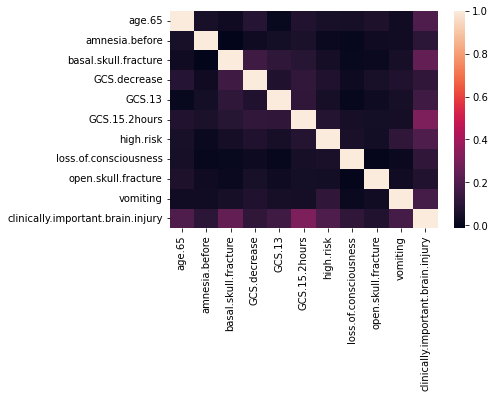

In [34]:
## plotting correlation heatmap
hmap = sns.heatmap(head_injury.corr())
plt.show()

# Now let's split the data up in training and test sets

In [36]:
# grabbing all input variables
X = head_injury.drop('clinically.important.brain.injury', axis =1)

# grabbing just the traget variable
y = head_injury[['clinically.important.brain.injury']]

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# getting the shape of each set
print("Shape of X_train is ", X_train.shape)
print("Shape of y_train is ", y_train.shape)
print("Shape of X_test is ", X_test.shape)
print("Shape of y_test is ", y_test.shape)

Shape of X_train is  (2184, 10)
Shape of y_train is  (2184, 1)
Shape of X_test is  (937, 10)
Shape of y_test is  (937, 1)


## Testing of Algorithms

### Random Forest

In [38]:
clf_rf = RandomForestClassifier(max_depth=None, random_state=0)

forest_model = clf_rf.fit(X_train, y_train.values.ravel())

y_forest_train_pred = forest_model.predict(X_train)

y_forest_test_pred = forest_model.predict(X_test)

In [89]:
## Accuracy Score
accuracy_training = accuracy_score(y_train, y_forest_train_pred)
print("The accuracy of the random forest classifier on the training set is ", accuracy_training)

accuracy_test = accuracy_score(y_test, y_forest_test_pred)
print("The accuracy of the random forest classifier on the test set is ", accuracy_test)

The accuracy of the random forest classifier on the training set is  0.9523809523809523
The accuracy of the random forest classifier on the test set is  0.9156883671291356


In [96]:
## F1 Score for the random forest
random_f1_training = f1_score(y_train, y_forest_train_pred)
print("The F1 score of the random forest classifier on the training set is ", random_f1_training)

random_f1_test = f1_score(y_test, y_forest_test_pred)
print("The F1 score of the random forest classifier on the test set is ", random_f1_test)

The F1 score of the random forest classifier on the training set is  0.5478260869565218
The F1 score of the random forest classifier on the test set is  0.34710743801652894


In [98]:
## Precision Score for the random forest
random_precision_training = precision_score(y_train, y_forest_train_pred)
print("The precision score of the random forest classifier on the training set is ", random_precision_training)

random_precision_test = precision_score(y_test, y_forest_test_pred)
print("The precision score of the random forest classifier on the test set is ", random_precision_test)

The precision score of the random forest classifier on the training set is  0.9
The precision score of the random forest classifier on the test set is  0.6774193548387096


In [117]:
## Recall Score for the random forest
random_recall_training = recall_score(y_train, y_forest_train_pred)
print("The recall score of the random forest classifier on the training set is ", random_recall_training)

random_recall_test = recall_score(y_test, y_forest_test_pred)
print("The recall score of the random forest classifier on the test set is ", random_recall_test)

The recall score of the random forest classifier on the training set is  0.39375
The recall score of the random forest classifier on the test set is  0.23333333333333334


In [41]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [55]:
## Now let's tune the hyper parameters

In [59]:
## tuning max_depth and max_features
param_grid = {"max_depth": range(1,20),
             "max_features":[0.2, 0.4, 0.6, 0.8]}

grid_forest = GridSearchCV(estimator=forest_model, param_grid=param_grid, scoring=None, cv=8)

In [60]:
## Random Forest - building model with best parameter values
grid_forest = grid_forest.fit(X_train, y_train.values.ravel())

print('Best max_depth:', grid_forest.best_estimator_.get_params()['max_depth'])
print('Best max_features:', grid_forest.best_estimator_.get_params()['max_features'])

Best max_depth: 6
Best max_features: 0.2


In [62]:
## Now that we know that best max_depth = 6 and best max_features of 0.2 is the best, 
## we can use those best hyperparameters...
best_forest = grid_forest.best_estimator_
best_forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=6, max_features=0.2, random_state=0)

In [119]:
## Getting y_pred for training and test sets and see the accuracy for random forest with tuned hyperparameters

y_train_best_forest_pred = grid_forest.predict(X_train)

y_test_best_forest_pred = grid_forest.predict(X_test)

## Accuracy score for the tuned random forest
rf_accuracy_training = accuracy_score(y_train, y_train_best_forest_pred)
print("The accuracy of the random forest model with tuned hyperparameters on the training set is ", rf_accuracy_training)

rf_accuracy_test = accuracy_score(y_test, y_test_best_forest_pred)
print("The accuracy of the random forest model with tuned parameters on the test set is ", rf_accuracy_test)

The accuracy of the random forest model with tuned hyperparameters on the training set is  0.9455128205128205
The accuracy of the random forest model with tuned parameters on the test set is  0.919957310565635


In [93]:
## F1 Score for the tuned random forest
rf_f1_training = f1_score(y_train, y_train_best_forest_pred)
print("The F1 score of the random forest model with tuned hyperparameters on the training set is ", rf_f1_training)

rf_f1_test = f1_score(y_test, y_test_best_forest_pred)
print("The F1 score of the random forest model with tuned parameters on the test set is ", rf_f1_test)

The F1 score of the random forest model with tuned hyperparameters on the training set is  0.4137931034482759
The F1 score of the random forest model with tuned parameters on the test set is  0.32432432432432434


In [95]:
## Precision Score for the tuned random forest
rf_precision_training = precision_score(y_train, y_train_best_forest_pred)
print("The precision score of the random forest model with tuned hyperparameters on the training set is ", rf_precision_training)

rf_precision_test = precision_score(y_test, y_test_best_forest_pred)
print("The precision score of the random forest model with tuned parameters on the test set is ", rf_precision_test)

The F1 score of the random forest model with tuned hyperparameters on the training set is  0.9767441860465116
The F1 score of the random forest model with tuned parameters on the test set is  0.8571428571428571


In [121]:
## Recall Score for the tuned random forest
rf_recall_training = recall_score(y_train, y_train_best_forest_pred)
print("The recall score of the tuned random forest classifier on the training set is ", rf_recall_training)

rf_recall_test = recall_score(y_test, y_test_best_forest_pred)
print("The recall score of the tuned random forest classifier on the test set is ", rf_recall_test)

The recall score of the tuned random forest classifier on the training set is  0.2625
The recall score of the tuned random forest classifier on the test set is  0.2


### K-Nearest Neighbors (K-NN)

In [115]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [66]:
## get y_pred for training set
y_knn_train_pred = knn.predict(X_train)

## get y_pred for test set
y_knn_test_pred = knn.predict(X_test)

## Accuracy scores
accuracy_training = accuracy_score(y_train, y_knn_train_pred)
print("The accuracy of K-NN on the training set is ", accuracy_training)

accuracy_test = accuracy_score(y_test, y_knn_test_pred)
print("The accuracy of K-NN on the test set is ", accuracy_test)

The accuracy of K-NN on the training set is  0.9395604395604396
The accuracy of K-NN on the test set is  0.9146211312700107


In [99]:
## F1 Score for the KNN
knn_f1_training = f1_score(y_train, y_knn_train_pred)
print("The F1 score of the K-NN on the training set is ", knn_f1_training)

knn_f1_test = f1_score(y_test, y_knn_test_pred)
print("The F1 score of the K-NN on the test set is ", knn_f1_test)

The F1 score of the random forest classifier on the training set is  0.3465346534653465
The F1 score of the random forest classifier on the test set is  0.27272727272727276


In [100]:
## Precision Score for the KNN
knn_precision_training = precision_score(y_train, y_knn_train_pred)
print("The precision score of the K-NN on the training set is ", knn_precision_training)

knn_precision_test = precision_score(y_test, y_knn_test_pred)
print("The precision score of the K-NN on the test set is ", knn_precision_test)

The precision score of the K-NN on the training set is  0.8333333333333334
The precision score of the K-NN on the test set is  0.75


In [122]:
## Recall Score for the KNN
knn_recall_training = recall_score(y_train, y_knn_train_pred)
print("The recall score of the K-NN on the training set is ", knn_recall_training)

knn_recall_test = recall_score(y_test, y_knn_test_pred)
print("The recall score of the K-NN on the test set is ", knn_recall_test)

The recall score of the K-NN on the training set is  0.21875
The recall score of the K-NN on the test set is  0.16666666666666666


In [67]:
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,50,2))
# type of distance (p=1 is manhattan; p=2 is euclidean)
p=[1,2]

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X_train,y_train.values.ravel())

#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 11


In [90]:
## Using knn with tuned hyperparameters
knn_best = KNeighborsClassifier(n_neighbors=11, p=1)
knn_best.fit(X_train, y_train.values.ravel())

## get y_pred for training set
y_knn_best_train_pred = knn_best.predict(X_train)

## get y_pred for test set
y_knn_best_test_pred = knn_best.predict(X_test)

## Accuracy scores
accuracy_training = accuracy_score(y_train, y_knn_best_train_pred)
print("The accuracy of K-NN with tuned hyperparameters on the training set is ", accuracy_training)

accuracy_test = accuracy_score(y_test, y_knn_best_test_pred)
print("The accuracy of K-NN with tuned hyperparameters on the test set is ", accuracy_test)

The accuracy of K-NN with tuned hyperparameters on the training set is  0.9340659340659341
The accuracy of K-NN with tuned hyperparameters on the test set is  0.9103521878335112


In [101]:
## F1 Score for the tuned KNN
tuned_knn_f1_training = f1_score(y_train, y_knn_best_train_pred)
print("The F1 score of the K-NN with tuned hyperparameters on the training set is ", tuned_knn_f1_training)

tuned_knn_f1_test = f1_score(y_test, y_knn_best_test_pred)
print("The F1 score of the K-NN with tuned hyperparameters on the test set is ", tuned_knn_f1_test)

The F1 score of the K-NN with tuned hyperparameters on the training set is  0.20879120879120877
The F1 score of the K-NN with tuned hyperparameters on the test set is  0.14285714285714288


In [123]:
## Precision Score for the tuned KNN
tuned_knn_precision_training = precision_score(y_train, y_knn_best_train_pred)
print("The precision score of the K-NN with tuned hyperparameters on the training set is ", tuned_knn_precision_training)

tuned_knn_precision_test = precision_score(y_test, y_knn_best_test_pred)
print("The precision score of the K-NN with tuned hyperparameters on the test set is ", tuned_knn_precision_test)

The precision score of the K-NN with tuned hyperparameters on the training set is  0.8636363636363636
The precision score of the K-NN with tuned hyperparameters on the test set is  0.875


In [129]:
## Recall Score for the tuned KNN
tuned_knn_recall_training = recall_score(y_train, y_knn_best_train_pred)
print("The recall score of the random forest classifier on the training set is ", tuned_knn_recall_training)

tuned_knn_recall_test = recall_score(y_test, y_knn_best_test_pred)
print("The recall score of the random forest classifier on the test set is ", tuned_knn_recall_test)

The recall score of the random forest classifier on the training set is  0.11875
The recall score of the random forest classifier on the test set is  0.07777777777777778


### Naive Bayes

Bernoulli Naive Bayes is the best fit since the predictors are boolean variables. 

In [70]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train.values.ravel())

BernoulliNB()

In [125]:
# predicting the y values with the model 
y_bnb_train_pred = bnb.predict(X_train)

y_bnb_test_pred = bnb.predict(X_test)

## Accuracy scores
accuracy_training = accuracy_score(y_train, y_bnb_train_pred)
print("The accuracy of the Bernoulli Naive Bayes on the training set is ", accuracy_training)

accuracy_test = accuracy_score(y_test, y_bnb_test_pred)
print("The accuracy of the Bernoulli Naive Bayes on the test set is ", accuracy_test)

The accuracy of the Bernoulli Naive Bayes on the training set is  0.9381868131868132
The accuracy of the Bernoulli Naive Bayes on the test set is  0.9156883671291356


In [103]:
## F1 Score for the BernoulliNB
bnb_f1_training = f1_score(y_train, y_bnb_train_pred)
print("The F1 score of the Bernoulli Naive Bayes on the training set is ", bnb_f1_training)

bnb_f1_test = f1_score(y_test, y_bnb_test_pred)
print("The F1 score of the Bernoulli Naive Bayes on the test set is ", bnb_f1_test)

The F1 score of the K-NN on the training set is  0.430379746835443
The F1 score of the K-NN on the test set is  0.4551724137931034


In [104]:
## Precision Score for the BernoulliNB
bnb_precision_training = precision_score(y_train, y_bnb_train_pred)
print("The precision score of the Bernoulli Naive Bayes on the training set is ", bnb_precision_training)

bnb_precision_test = precision_score(y_test, y_bnb_test_pred)
print("The precision score of the Bernoulli Naive Bayes on the test set is ", bnb_precision_test)

The precision score of the K-NN on the training set is  0.6623376623376623
The precision score of the K-NN on the test set is  0.6


In [126]:
## Recall Score for the BernoulliNB
bnb_recall_training = recall_score(y_train, y_bnb_train_pred)
print("The recall score of the random forest classifier on the training set is ", bnb_recall_training)

bnb_recall_test = recall_score(y_test, y_bnb_test_pred)
print("The recall score of the random forest classifier on the test set is ", bnb_recall_test)

The recall score of the random forest classifier on the training set is  0.31875
The recall score of the random forest classifier on the test set is  0.36666666666666664


In [72]:
# let's get some parameters
print(bnb.get_params())

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}


In [73]:
# let's focus on adjusting the alpha value 
params = [{'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}]
grid = GridSearchCV(estimator=BernoulliNB(), param_grid=params, cv=8, scoring='accuracy')
grid.fit(X_train, y_train.values.ravel())
print(grid.best_estimator_)

BernoulliNB(alpha=1)


Since default value of alpha for BernoulliNB( ) is 1, and the best estimator for alpha is 1, there isn't anything to adjust.

### Logistic Regression

In [78]:
logreg = LogisticRegression(random_state=42).fit(X_train, y_train.values.ravel())
logreg

LogisticRegression(random_state=42)

In [79]:
# predicting the y values with the model 
y_logreg_train_pred = logreg.predict(X_train)

y_logreg_test_pred = logreg.predict(X_test)

## Accuracy scores
accuracy_training = accuracy_score(y_train, y_logreg_train_pred)
print("The accuracy of the Logistic Regression on the training set is ", accuracy_training)

accuracy_test = accuracy_score(y_test, y_logreg_test_pred)
print("The accuracy of the Logistic Regression on the test set is ", accuracy_test)

The accuracy of the Logistic Regression on the training set is  0.9391025641025641
The accuracy of the Logistic Regression on the test set is  0.919957310565635


In [105]:
## F1 Score for the Logistic Regression
logreg_f1_training = f1_score(y_train, y_logreg_train_pred)
print("The F1 score of the Logistic Regression on the training set is ", logreg_f1_training)

logreg_f1_test = f1_score(y_test, y_logreg_test_pred)
print("The F1 score of the Logistic Regression on the test set is ", logreg_f1_test)

The F1 score of the Logistic Regression on the training set is  0.3755868544600939
The F1 score of the Logistic Regression on the test set is  0.4


In [106]:
## Precision Score for the Logistic Regression
logreg_precision_training = precision_score(y_train, y_logreg_train_pred)
print("The precision score of the Logistic Regression on the training set is ", logreg_precision_training)

logreg_precision_test = precision_score(y_test, y_logreg_test_pred)
print("The precision score of the Logistic Regression on the test set is ", logreg_precision_test)

The precision score of the K-NN on the training set is  0.7547169811320755
The precision score of the K-NN on the test set is  0.7142857142857143


In [130]:
## Recall Score for the Logistic Regression
logreg_recall_training = recall_score(y_train, y_logreg_train_pred)
print("The recall score of the Logistic Regression on the training set is ", logreg_recall_training)

logreg_recall_test = recall_score(y_test, y_logreg_test_pred)
print("The recall score of the Logistic Regression on the test set is ", logreg_recall_test)

The recall score of the Logistic Regression on the training set is  0.25
The recall score of the Logistic Regression on the test set is  0.2777777777777778


In [108]:
# Using GridSearchCV on Logistic Regression 

#List Hyperparameters that we want to tune.
penalty=['l1','l2', 'elasticnet']
C = np.logspace(-4, 4, 20)

#Convert to dictionary
hyperparameters = dict(penalty=penalty, C=C)

#Create new Logistic Regression object
logreg_2 = LogisticRegression()

#Use GridSearch
clf = GridSearchCV(logreg_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X_train,y_train.values.ravel())

#Print The value of best Hyperparameters
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 4.281332398719396


/Users/teresavail/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
400 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/teresavail/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/teresavail/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/teresavail/.pyenv/versions/3.10.5/lib/pyt

In [109]:
## Using logistic regression with tuned hyperparameters

logreg_best = LogisticRegression(random_state=42, penalty='l2', C=4.281332398719396).fit(X_train, y_train.values.ravel())

# predicting the y values with the model 
y_logreg_best_train_pred = logreg_best.predict(X_train)

y_logreg_best_test_pred = logreg_best.predict(X_test)

## Accuracy scores
logreg_best_accuracy_training = accuracy_score(y_train, y_logreg_best_train_pred)
print("The accuracy of the Logistic Regression with tuned hyperparameters on the training set is ", logreg_best_accuracy_training)

logreg_best_accuracy_test = accuracy_score(y_test, y_logreg_best_test_pred)
print("The accuracy of the Logistic Regression with tuned hyperparameters on the test set is ", logreg_best_accuracy_test)

The accuracy of the Logistic Regression on the training set is  0.940018315018315
The accuracy of the Logistic Regression on the test set is  0.9188900747065102


In [110]:
## F1 Score for the tuned Logistic Regression
logreg_best_f1_training = f1_score(y_train, y_logreg_best_train_pred)
print("The F1 score of the tuned Logistic Regression on the training set is ", logreg_best_f1_training)

logreg_best_f1_test = f1_score(y_test, y_logreg_best_test_pred)
print("The F1 score of the tuned Logistic Regression on the test set is ", logreg_best_f1_test)

The F1 score of the Logistic Regression on the training set is  0.39631336405529954
The F1 score of the Logistic Regression on the test set is  0.40625


In [111]:
## Precision Score for the tuned Logistic Regression
logreg_best_precision_training = precision_score(y_train, y_logreg_best_train_pred)
print("The precision score of the tuned Logistic Regression on the training set is ", logreg_best_precision_training)

logreg_best_precision_test = precision_score(y_test, y_logreg_best_test_pred)
print("The precision score of the tuned Logistic Regression on the test set is ", logreg_best_precision_test)

The precision score of the Logistic Regression on the training set is  0.7543859649122807
The precision score of the Logistic Regression on the test set is  0.6842105263157895


In [128]:
## Recall Score for the tuned Logistic Regression
logreg_best_recall_training = recall_score(y_train, y_logreg_best_train_pred)
print("The recall score of the tuned Logistic Regression on the training set is ", logreg_best_recall_training)

logreg_best_recall_test = recall_score(y_test, y_logreg_best_test_pred)
print("The recall score of the tuned random Logistic Regression on the test set is ", logreg_best_recall_test)

The recall score of the tuned Logistic Regression on the training set is  0.26875
The recall score of the tuned random Logistic Regression on the test set is  0.28888888888888886


In [85]:
## General playing around with Logistic Regression before hyperparameter tuning

# confusion matrix
cm = confusion_matrix(y_test, y_logreg_test_pred)
cm

array([[837,  10],
       [ 65,  25]])

In [86]:
# print the classification report with f-scores
print(classification_report(y_test, y_logreg_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       847
           1       0.71      0.28      0.40        90

    accuracy                           0.92       937
   macro avg       0.82      0.63      0.68       937
weighted avg       0.91      0.92      0.90       937



In [87]:
## Extracting the values of coefficients of the logistic regression model
values = np.append(logreg.intercept_, logreg.coef_)
names = np.append("intercept", X.columns)
parameters = pd.DataFrame(values, index=names, columns=["coef"])
parameters

,coef
intercept,-4.308650
age.65,1.216197
amnesia.before,0.691451
basal.skull.fracture,1.888005
GCS.decrease,0.175991
GCS.13,1.207188
GCS.15.2hours,1.488685
high.risk,1.066512
loss.of.consciousness,0.871961
open.skull.fracture,0.292825


In [88]:
parameters['exp_coef'] = np.exp(parameters.coef)
parameters

,coef,exp_coef
intercept,-4.308650,0.013452
age.65,1.216197,3.374332
amnesia.before,0.691451,1.996610
basal.skull.fracture,1.888005,6.606174
GCS.decrease,0.175991,1.192427
GCS.13,1.207188,3.344067
GCS.15.2hours,1.488685,4.431267
high.risk,1.066512,2.905227
loss.of.consciousness,0.871961,2.391596
open.skull.fracture,0.292825,1.340208


The coefficients of the logistic regression model can be interpreted as follows:
- The age.65 coefficient is 1.216197, meaning that if every other factor is held constant and the age.65 is increased by 1, the log odd would increase by 1.216197, and therefore the odds of being diagnosed with clinically important brain injury would increase by exp(1.216197) = 3.374332
- The amnesia.before coefficient is 0.691451, meaning that if every other factor is held constant and the amensia.before is increased by 1, the log odd would increase by 0.691451, and therefore the odds of being diagnosed with clinically important brain injury would increase by 1.996610.
- The basal skull fracture coefficient is 1.88805, meaning that if every other factor is held constant and the basal.skull.fracture is increased by 1, the odds of being diagnosed with clinically important brain injury would increase by 6.606174
- The GCS.decrease coefficient is 0.175991, meaning that if every other factor is held constant and the GCS.decrease is increased by 1, the odds of being diagnosed with clinically important brain injury would increase by 1.192427.
- The GCS.13 coefficient is 1.207188, meaning that if every other factor is held constant and the GCS.13 is increased by 1, the odds of being diagnosed with clinically important brain injury is 3.344067
- The GCS15.2hours coefficient is 1.488685, meaning that if every other factor is held constant and the GCS15.2hours is increased by 1, the odds of being diagnosed with clinically important brain injury is 4.431267
- The high.risk coefficient is 1.066512, meaning that if every other factor is held constant and the high.risk is increased by 1, the odds of being diagnosed with clinically important brain injury is 2.905227
- The loss.of.consciousness coefficient is 0.871961, meaning that if every other factor is held constant and the loss.of.consciousness is increased by 1, the odds of being diagnosed with clinically important brain injury is 2.391596
- The open.skull.fracture coefficient is 0.292825, meaning that if every other factor is held constant and the open.skull.fracture is increased by 1, the odds of being diagnosed with clinically important brain injury is 1.340208
- The vomiting coefficient is 1.138958, meaning that if every other factor is held constant and the vomiting is increased by 1, the odds of being diagnosed with clinically important brain injury is 3.123513